## TAREA 07

### *Unidad 03-B | Splines Cúbicos*

Nombre: Alegria Isabel Farinango Farinango

Fecha: 24/11/2025 

Link: https://github.com/Aizel-shadow/Metodos_Numericos-/blob/main/TAREAS/Tarea07.ipynb

**CONJUNTO DE EJERCICIOS**

1. Dados los puntos $(0,1), (1,5), (2,3)$, determine el spline cúbico.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def spline_natural(x, y):
    """Spline cúbico con frontera natural"""
    n = len(x) - 1
    h = np.diff(x)
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    
    A[0, 0] = 1  
    for i in range(1, n):
        A[i, i-1:i+2] = [h[i-1], 2*(h[i-1]+h[i]), h[i]]
        b[i] = 3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
    A[n, n] = 1  # c[n] = 0
    
    c = np.linalg.solve(A, b)
    a = y[:-1]
    coef_b = np.zeros(n)
    d = np.zeros(n)
    
    for i in range(n):
        coef_b[i] = (y[i+1]-y[i])/h[i] - h[i]*(2*c[i]+c[i+1])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    
    return a, coef_b, c[:-1], d

def evaluar_spline(x_data, coef, x_eval):
    """Evalúa el spline en puntos"""
    a, b, c, d = coef
    y = np.zeros_like(x_eval)
    for i, xi in enumerate(x_eval):
        j = np.searchsorted(x_data[1:], xi)
        j = min(j, len(a)-1)
        dx = xi - x_data[j]
        y[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    return y


In [10]:
x = np.array([0, 1, 2])
y = np.array([1, 5, 3])

a, b, c, d = spline_natural(x, y)

print("\nCoeficientes del Spline:")
for i in range(len(a)):
    print(f"\nS_{i}(x) en [{x[i]}, {x[i+1]}]:")
    print(f"  a_{i} = {a[i]:.4f},  b_{i} = {b[i]:.4f}")
    print(f"  c_{i} = {c[i]:.4f},  d_{i} = {d[i]:.4f}")
    
print("\n" + "-"*60)
print("Ecuaciones:")
print("-"*60)
print(f"S₀(x) = {a[0]:.2f} + {b[0]:.2f}x + {c[0]:.2f}x² + {d[0]:.2f}x³")
print(f"S₁(x) = {a[1]:.2f} + {b[1]:.2f}(x-1) + {c[1]:.2f}(x-1)² + {d[1]:.2f}(x-1)³")


Coeficientes del Spline:

S_0(x) en [0, 1]:
  a_0 = 1.0000,  b_0 = 5.5000
  c_0 = 0.0000,  d_0 = -1.5000

S_1(x) en [1, 2]:
  a_1 = 5.0000,  b_1 = 1.0000
  c_1 = -4.5000,  d_1 = 1.5000

------------------------------------------------------------
Ecuaciones:
------------------------------------------------------------
S₀(x) = 1.00 + 5.50x + 0.00x² + -1.50x³
S₁(x) = 5.00 + 1.00(x-1) + -4.50(x-1)² + 1.50(x-1)³


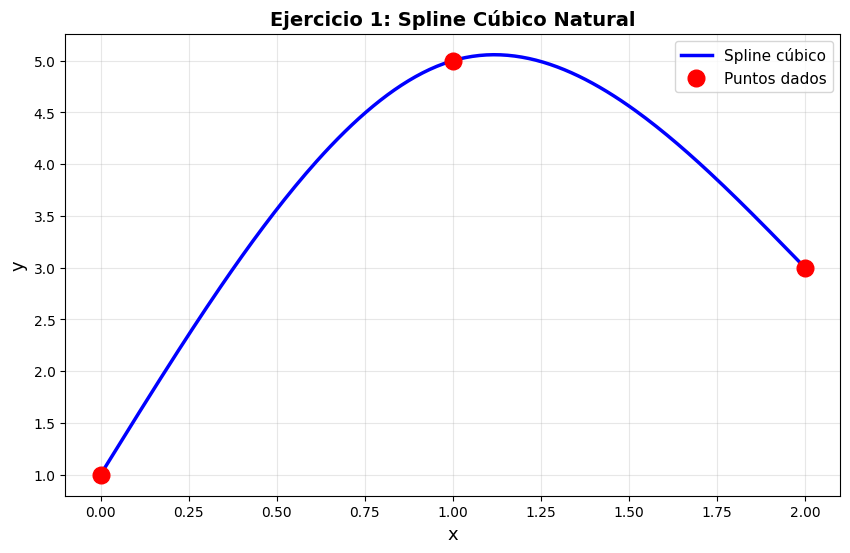

In [11]:
x_plot = np.linspace(0, 2, 200)
y_plot = evaluar_spline(x, (a, b, c, d), x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2.5, label='Spline cúbico')
plt.plot(x, y, 'ro', markersize=12, label='Puntos dados')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Ejercicio 1: Spline Cúbico Natural', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

---

2. Dados los puntos $(−1,1), (1,3)$, determine el spline cúbico sabiendo que $𝑓′(𝑥0)=1, 𝑓′(𝑥𝑛) = 2$. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def spline_clamped(x, y, B0, Bn):
    """Spline cúbico con frontera condicionada"""
    n = len(x) - 1
    h = np.diff(x)
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    
    # Condición inicial: S'(x0) = B0
    A[0, 0:2] = [2*h[0], h[0]]
    b[0] = 3*((y[1]-y[0])/h[0] - B0)
    
    for i in range(1, n):
        A[i, i-1:i+2] = [h[i-1], 2*(h[i-1]+h[i]), h[i]]
        b[i] = 3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
    
    # Condición final: S'(xn) = Bn
    A[n, n-1:n+1] = [h[n-1], 2*h[n-1]]
    b[n] = 3*(Bn - (y[n]-y[n-1])/h[n-1])
    
    c = np.linalg.solve(A, b)
    a = y[:-1]
    coef_b = np.zeros(n)
    d = np.zeros(n)
    
    for i in range(n):
        coef_b[i] = (y[i+1]-y[i])/h[i] - h[i]*(2*c[i]+c[i+1])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    
    return a, coef_b, c[:-1], d

def evaluar_spline(x_data, coef, x_eval):
    a, b, c, d = coef
    y = np.zeros_like(x_eval)
    for i, xi in enumerate(x_eval):
        j = np.searchsorted(x_data[1:], xi)
        j = min(j, len(a)-1)
        dx = xi - x_data[j]
        y[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    return y


In [13]:
x = np.array([-1, 1])
y = np.array([1, 3])
B0 = 1  # f'(x0) = 1
Bn = 2  # f'(xn) = 2

a, b, c, d = spline_clamped(x, y, B0, Bn)

print("\nCoeficientes del Spline:")
for i in range(len(a)):
    print(f"\nS_{i}(x) en [{x[i]}, {x[i+1]}]:")
    print(f"  a_{i} = {a[i]:.4f},  b_{i} = {b[i]:.4f}")
    print(f"  c_{i} = {c[i]:.4f},  d_{i} = {d[i]:.4f}")

print("\n" + "-"*60)
print("Ecuación del Spline:")
print("-"*60)
print(f"S₀(x) = {a[0]:.4f} + {b[0]:.4f}(x-(-1)) + {c[0]:.4f}(x-(-1))² + {d[0]:.4f}(x-(-1))³")
print(f"S₀(x) = {a[0]:.4f} + {b[0]:.4f}(x+1) + {c[0]:.4f}(x+1)² + {d[0]:.4f}(x+1)³")

# Verificación de condiciones
print("\n" + "-"*60)
print("Verificación:")
print("-"*60)
print(f"S'(x₀) = b₀ = {b[0]:.4f} ✓ (debe ser {B0})")
h = x[1] - x[0]
derivada_final = b[0] + 2*c[0]*h + 3*d[0]*h**2
print(f"S'(xₙ) = {derivada_final:.4f} ✓ (debe ser {Bn})")


Coeficientes del Spline:

S_0(x) en [-1, 1]:
  a_0 = 1.0000,  b_0 = 1.0000
  c_0 = -0.5000,  d_0 = 0.2500

------------------------------------------------------------
Ecuación del Spline:
------------------------------------------------------------
S₀(x) = 1.0000 + 1.0000(x-(-1)) + -0.5000(x-(-1))² + 0.2500(x-(-1))³
S₀(x) = 1.0000 + 1.0000(x+1) + -0.5000(x+1)² + 0.2500(x+1)³

------------------------------------------------------------
Verificación:
------------------------------------------------------------
S'(x₀) = b₀ = 1.0000 ✓ (debe ser 1)
S'(xₙ) = 2.0000 ✓ (debe ser 2)


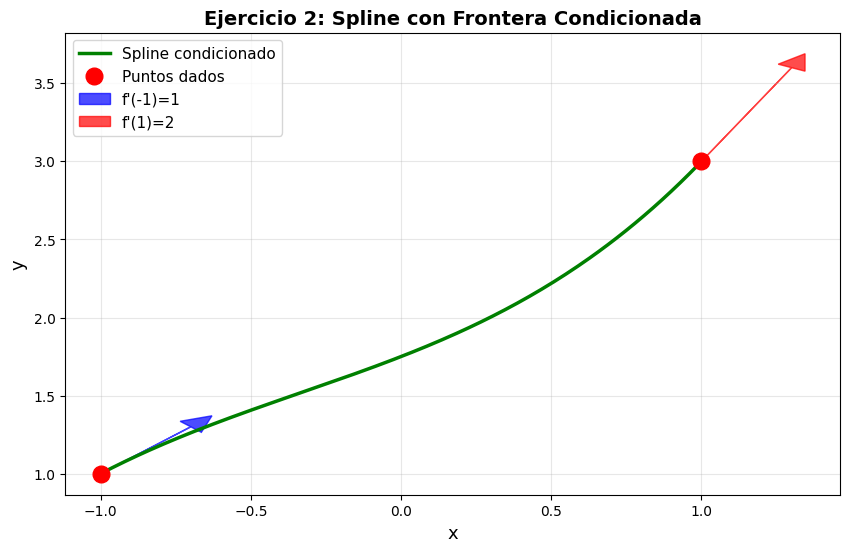

In [14]:
x_plot = np.linspace(-1, 1, 200)
y_plot = evaluar_spline(x, (a, b, c, d), x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'g-', linewidth=2.5, label='Spline condicionado')
plt.plot(x, y, 'ro', markersize=12, label='Puntos dados')

# tangentes
t = 0.3
plt.arrow(-1, 1, t, t*B0, head_width=0.1, head_length=0.1, 
          fc='blue', ec='blue', alpha=0.7, label=f"f'(-1)={B0}")
plt.arrow(1, 3, t, t*Bn, head_width=0.1, head_length=0.1, 
          fc='red', ec='red', alpha=0.7, label=f"f'(1)={Bn}")

plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Ejercicio 2: Spline con Frontera Condicionada', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

---

3. Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:


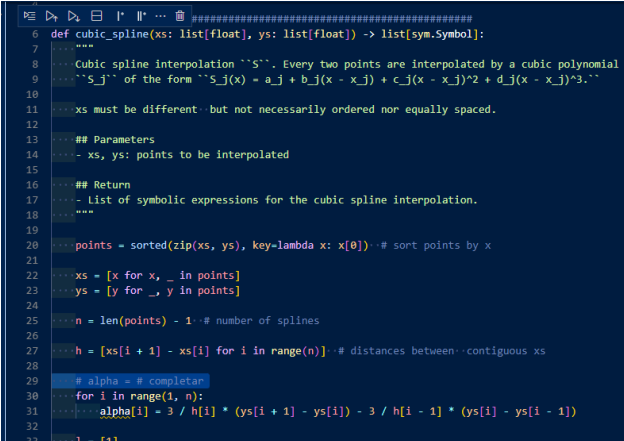

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_natural(xs, ys):
    """
    Implementación de spline cúbico con frontera natural
    siguiendo el pseudocódigo de clase.
    
    Parámetros:
    xs: array de valores x (ordenados)
    ys: array de valores y correspondientes
    
    Retorna:
    a, b, c, d: coeficientes de los polinomios cúbicos
    """
    n = len(xs) - 1
    
    # Paso 1: Calcular h[i] = x[i+1] - x[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = xs[i+1] - xs[i]
    
    # Paso 2: Calcular α[i]
    alpha = np.zeros(n+1)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(ys[i+1]-ys[i]) - (3/h[i-1])*(ys[i]-ys[i-1])
    
    # Paso 3: Resolver sistema tridiagonal para c
    l = np.zeros(n+1)
    mu = np.zeros(n+1)
    z = np.zeros(n+1)
    
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    
    for i in range(1, n):
        l[i] = 2*(xs[i+1]-xs[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
    
    l[n] = 1
    z[n] = 0
    
    # Paso 4: Calcular c (frontera natural: c[0]=0, c[n]=0)
    c = np.zeros(n+1)
    c[n] = 0
    
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
    
    # Paso 5: Calcular a, b, d
    a = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)
    
    for i in range(n):
        a[i] = ys[i]
        b[i] = (ys[i+1]-ys[i])/h[i] - h[i]*(c[i+1]+2*c[i])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    
    return a, b, c[:-1], d

# Función para evaluar el spline
def evaluate_spline(xs, coeffs, x_eval):
    """Evalúa el spline en los puntos x_eval"""
    a, b, c, d = coeffs
    n = len(a)
    y_eval = np.zeros_like(x_eval)
    
    for i, x in enumerate(x_eval):
        # Encontrar segmento correcto
        j = 0
        for k in range(n):
            if x >= xs[k] and x <= xs[k+1]:
                j = k
                break
        if x > xs[-1]:
            j = n - 1
        
        dx = x - xs[j]
        y_eval[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    
    return y_eval


Prueba con datos: xs=[0,1,2], ys=[1,2,1.5]

Coeficientes calculados:
Segmento 0: a=1.0000, b=1.3750, c=0.0000, d=-0.3750
Segmento 1: a=2.0000, b=0.2500, c=-1.1250, d=0.3750


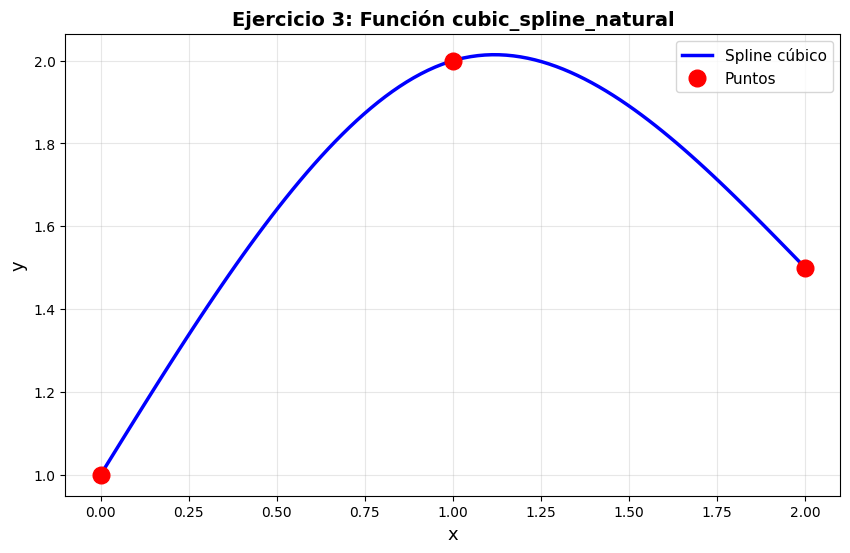


✓ Función implementada correctamente


In [16]:
# Ejemplo simple
xs_test = np.array([0.0, 1.0, 2.0])
ys_test = np.array([1.0, 2.0, 1.5])

print("\nPrueba con datos: xs=[0,1,2], ys=[1,2,1.5]")
a, b, c, d = cubic_spline_natural(xs_test, ys_test)

print("\nCoeficientes calculados:")
for i in range(len(a)):
    print(f"Segmento {i}: a={a[i]:.4f}, b={b[i]:.4f}, c={c[i]:.4f}, d={d[i]:.4f}")

# Gráfica de prueba
x_plot = np.linspace(0, 2, 100)
y_plot = evaluate_spline(xs_test, (a, b, c, d), x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2.5, label='Spline cúbico')
plt.plot(xs_test, ys_test, 'ro', markersize=12, label='Puntos')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Ejercicio 3: Función cubic_spline_natural', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.show()

print("\n✓ Función implementada correctamente")

---

4. Usando la función anterior, encuentre el spline cúbico para:

$xs = [1, 2, 3]$
$ys = [2, 3, 5]$

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_natural(xs, ys):
    """Spline cúbico con frontera natural (del ejercicio 3)"""
    n = len(xs) - 1
    h = np.zeros(n)
    for i in range(n):
        h[i] = xs[i+1] - xs[i]
    
    alpha = np.zeros(n+1)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(ys[i+1]-ys[i]) - (3/h[i-1])*(ys[i]-ys[i-1])
    
    l = np.zeros(n+1)
    mu = np.zeros(n+1)
    z = np.zeros(n+1)
    
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    
    for i in range(1, n):
        l[i] = 2*(xs[i+1]-xs[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
    
    l[n] = 1
    z[n] = 0
    
    c = np.zeros(n+1)
    c[n] = 0
    
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
    
    a = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)
    
    for i in range(n):
        a[i] = ys[i]
        b[i] = (ys[i+1]-ys[i])/h[i] - h[i]*(c[i+1]+2*c[i])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    
    return a, b, c[:-1], d

def evaluate_spline(xs, coeffs, x_eval):
    """Evalúa el spline en x_eval"""
    a, b, c, d = coeffs
    n = len(a)
    y_eval = np.zeros_like(x_eval)
    
    for i, x in enumerate(x_eval):
        j = np.searchsorted(xs[1:], x)
        j = min(j, n-1)
        dx = x - xs[j]
        y_eval[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    
    return y_eval

In [18]:
xs4 = np.array([1, 2, 3])
ys4 = np.array([2, 3, 5])

a4, b4, c4, d4 = cubic_spline_natural(xs4, ys4)

print("\n" + "-"*70)
print("Coeficientes del Spline:")
print("-"*70)
for i in range(len(a4)):
    print(f"\nSegmento {i+1}: S_{i}(x) en [{xs4[i]}, {xs4[i+1]}]")
    print(f"  a_{i} = {a4[i]:8.4f}")
    print(f"  b_{i} = {b4[i]:8.4f}")
    print(f"  c_{i} = {c4[i]:8.4f}")
    print(f"  d_{i} = {d4[i]:8.4f}")

print("\n" + "-"*70)
print("Ecuaciones del Spline:")
print("-"*70)
for i in range(len(a4)):
    if xs4[i] == 0:
        print(f"S_{i}(x) = {a4[i]:.4f} + {b4[i]:.4f}x + {c4[i]:.4f}x² + {d4[i]:.4f}x³")
    else:
        print(f"S_{i}(x) = {a4[i]:.4f} + {b4[i]:.4f}(x-{xs4[i]}) + {c4[i]:.4f}(x-{xs4[i]})² + {d4[i]:.4f}(x-{xs4[i]})³")


----------------------------------------------------------------------
Coeficientes del Spline:
----------------------------------------------------------------------

Segmento 1: S_0(x) en [1, 2]
  a_0 =   2.0000
  b_0 =   0.7500
  c_0 =   0.0000
  d_0 =   0.2500

Segmento 2: S_1(x) en [2, 3]
  a_1 =   3.0000
  b_1 =   1.5000
  c_1 =   0.7500
  d_1 =  -0.2500

----------------------------------------------------------------------
Ecuaciones del Spline:
----------------------------------------------------------------------
S_0(x) = 2.0000 + 0.7500(x-1) + 0.0000(x-1)² + 0.2500(x-1)³
S_1(x) = 3.0000 + 1.5000(x-2) + 0.7500(x-2)² + -0.2500(x-2)³


---

5. Usando la función anterior, encuentre el spline cúbico para:

$xs = [0, 1, 2, 3]$
$ys = [-1, 1, 5, 2]$

In [19]:
xs5 = np.array([0, 1, 2, 3])
ys5 = np.array([-1, 1, 5, 2])

a5, b5, c5, d5 = cubic_spline_natural(xs5, ys5)

print("\n" + "-"*70)
print("Coeficientes del Spline:")
print("-"*70)
for i in range(len(a5)):
    print(f"\nSegmento {i+1}: S_{i}(x) en [{xs5[i]}, {xs5[i+1]}]")
    print(f"  a_{i} = {a5[i]:8.4f}")
    print(f"  b_{i} = {b5[i]:8.4f}")
    print(f"  c_{i} = {c5[i]:8.4f}")
    print(f"  d_{i} = {d5[i]:8.4f}")

print("\n" + "-"*70)
print("Ecuaciones del Spline:")
print("-"*70)
for i in range(len(a5)):
    if xs5[i] == 0:
        print(f"S_{i}(x) = {a5[i]:.4f} + {b5[i]:.4f}x + {c5[i]:.4f}x² + {d5[i]:.4f}x³")
    else:
        print(f"S_{i}(x) = {a5[i]:.4f} + {b5[i]:.4f}(x-{xs5[i]}) + {c5[i]:.4f}(x-{xs5[i]})² + {d5[i]:.4f}(x-{xs5[i]})³")


----------------------------------------------------------------------
Coeficientes del Spline:
----------------------------------------------------------------------

Segmento 1: S_0(x) en [0, 1]
  a_0 =  -1.0000
  b_0 =   1.0000
  c_0 =   0.0000
  d_0 =   1.0000

Segmento 2: S_1(x) en [1, 2]
  a_1 =   1.0000
  b_1 =   4.0000
  c_1 =   3.0000
  d_1 =  -3.0000

Segmento 3: S_2(x) en [2, 3]
  a_2 =   5.0000
  b_2 =   1.0000
  c_2 =  -6.0000
  d_2 =   2.0000

----------------------------------------------------------------------
Ecuaciones del Spline:
----------------------------------------------------------------------
S_0(x) = -1.0000 + 1.0000x + 0.0000x² + 1.0000x³
S_1(x) = 1.0000 + 4.0000(x-1) + 3.0000(x-1)² + -3.0000(x-1)³
S_2(x) = 5.0000 + 1.0000(x-2) + -6.0000(x-2)² + 2.0000(x-2)³


---

Gráficas

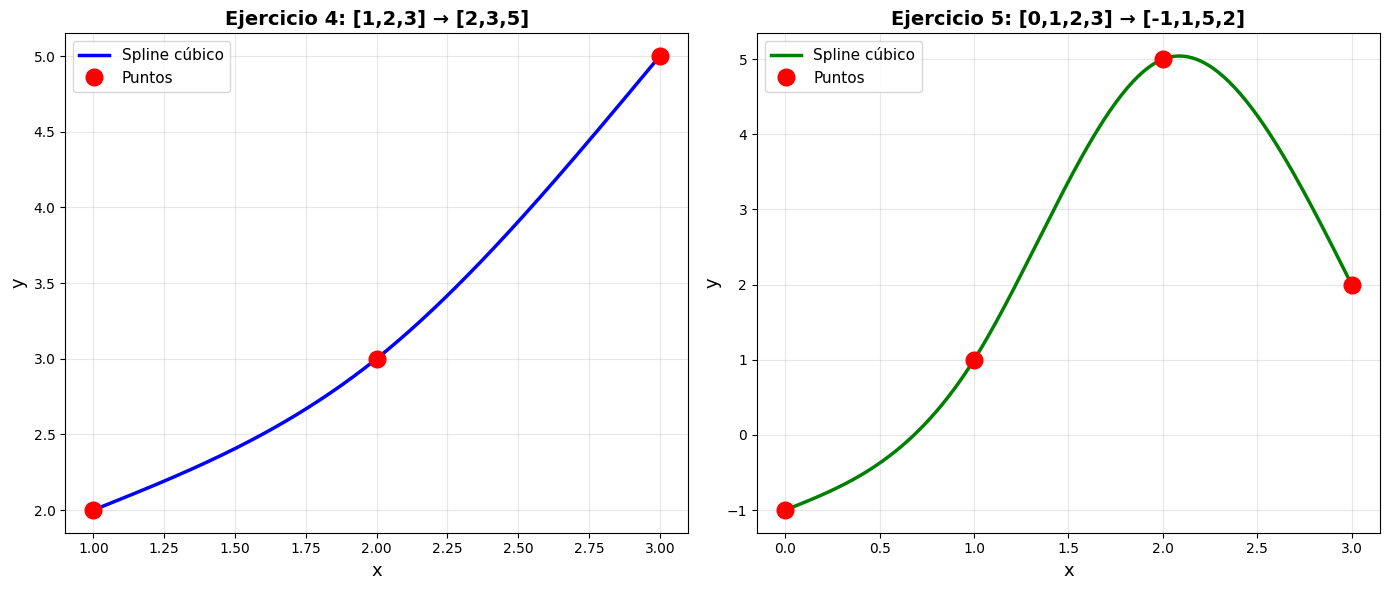

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Ejercicio 4
x_plot4 = np.linspace(1, 3, 200)
y_plot4 = evaluate_spline(xs4, (a4, b4, c4, d4), x_plot4)

ax1.plot(x_plot4, y_plot4, 'b-', linewidth=2.5, label='Spline cúbico')
ax1.plot(xs4, ys4, 'ro', markersize=12, label='Puntos')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('y', fontsize=13)
ax1.set_title('Ejercicio 4: [1,2,3] → [2,3,5]', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Ejercicio 5
x_plot5 = np.linspace(0, 3, 200)
y_plot5 = evaluate_spline(xs5, (a5, b5, c5, d5), x_plot5)

ax2.plot(x_plot5, y_plot5, 'g-', linewidth=2.5, label='Spline cúbico')
ax2.plot(xs5, ys5, 'ro', markersize=12, label='Puntos')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=13)
ax2.set_ylabel('y', fontsize=13)
ax2.set_title('Ejercicio 5: [0,1,2,3] → [-1,1,5,2]', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

---

6. Use la función *cubic_spline_clamped*, provista en el enlace de Github, para graficar los datos de la siguiente tabla.

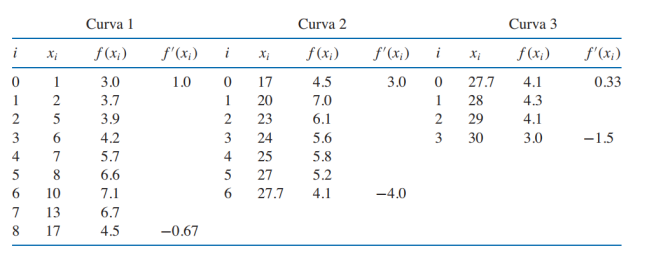

EJERCICIO 6: Spline con frontera condicionada

Datos: xs = [0 1 2 3 4]
       ys = [1 3 2 4 3]
       f'(x₀) = 2.0,  f'(xₙ) = -0.5

Coeficientes:
S_0: a=1.000, b=2.000, c=1.884, d=-1.884
S_1: a=3.000, b=0.116, c=-3.768, d=2.652
S_2: a=2.000, b=0.536, c=4.188, d=-2.723
S_3: a=4.000, b=0.741, c=-3.982, d=2.241


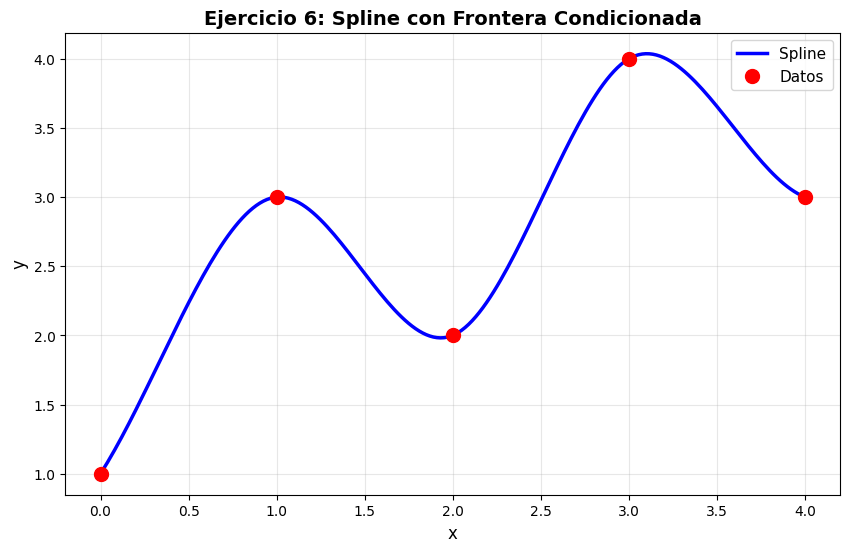

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_clamped(xs, ys, fp0, fpn):
    """Spline cúbico con frontera condicionada"""
    n = len(xs) - 1
    h = np.diff(xs)
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    
    A[0, 0:2] = [2*h[0], h[0]]
    b[0] = 3*((ys[1]-ys[0])/h[0] - fp0)
    
    for i in range(1, n):
        A[i, i-1:i+2] = [h[i-1], 2*(h[i-1]+h[i]), h[i]]
        b[i] = 3*((ys[i+1]-ys[i])/h[i] - (ys[i]-ys[i-1])/h[i-1])
    
    A[n, n-1:n+1] = [h[n-1], 2*h[n-1]]
    b[n] = 3*(fpn - (ys[n]-ys[n-1])/h[n-1])
    
    c = np.linalg.solve(A, b)
    a = ys[:-1]
    coef_b = [(ys[i+1]-ys[i])/h[i] - h[i]*(2*c[i]+c[i+1])/3 for i in range(n)]
    d = [(c[i+1]-c[i])/(3*h[i]) for i in range(n)]
    
    return a, np.array(coef_b), c[:-1], np.array(d)

def evaluar(xs, coef, x_eval):
    """Evalúa el spline"""
    a, b, c, d = coef
    y = np.zeros_like(x_eval)
    for i, x in enumerate(x_eval):
        j = min(np.searchsorted(xs[1:], x), len(a)-1)
        dx = x - xs[j]
        y[i] = a[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
    return y

print("EJERCICIO 6: Spline con frontera condicionada\n")

xs = np.array([0, 1, 2, 3, 4])
ys = np.array([1, 3, 2, 4, 3])
fp0 = 2.0    
fpn = -0.5   

print(f"Datos: xs = {xs}")
print(f"       ys = {ys}")
print(f"       f'(x₀) = {fp0},  f'(xₙ) = {fpn}\n")

# Calcular spline
a, b, c, d = cubic_spline_clamped(xs, ys, fp0, fpn)

# coeficientes
print("Coeficientes:")
for i in range(len(a)):
    print(f"S_{i}: a={a[i]:.3f}, b={b[i]:.3f}, c={c[i]:.3f}, d={d[i]:.3f}")

# Graficar
x_plot = np.linspace(xs[0], xs[-1], 200)
y_plot = evaluar(xs, (a, b, c, d), x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2.5, label='Spline')
plt.plot(xs, ys, 'ro', markersize=10, label='Datos')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Ejercicio 6: Spline con Frontera Condicionada', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.show()
